In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("smart_city_real_time_analytics_enhanced.csv")
print(df)

              Timestamp               Location  Vehicle_Count  \
0   2025-03-05 08:00:00  40.606888, -73.942885             40   
1   2025-03-05 08:05:00  40.574001, -73.730439            289   
2   2025-03-05 08:10:00  40.836555, -73.881807            108   
3   2025-03-05 08:15:00  40.584531, -73.926613             20   
4   2025-03-05 08:20:00  40.724206, -73.916275            232   
..                  ...                    ...            ...   
95  2025-03-05 15:55:00    40.8391, -73.877723             26   
96  2025-03-05 16:00:00  40.542694, -73.994461            143   
97  2025-03-05 16:05:00  40.689928, -73.915137             18   
98  2025-03-05 16:10:00  40.546799, -73.992809            100   
99  2025-03-05 16:15:00  40.796915, -73.888186             99   

    Average_Speed (km/h)  Congestion_Level (%) Accident_Reported  \
0                  46.31                 42.11                No   
1                  78.15                  2.31                No   
2              

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      100 non-null    object 
 1   Location                       100 non-null    object 
 2   Vehicle_Count                  100 non-null    int64  
 3   Average_Speed (km/h)           100 non-null    float64
 4   Congestion_Level (%)           100 non-null    float64
 5   Accident_Reported              100 non-null    object 
 6   Traffic_Camera_Status          100 non-null    object 
 7   PM2.5 (µg/m³)                  100 non-null    float64
 8   CO2_Level (ppm)                100 non-null    float64
 9   Humidity (%)                   100 non-null    float64
 10  Temperature (°C)               100 non-null    float64
 11  Bus_Location                   100 non-null    object 
 12  Bus_Occupancy                  100 non-null    int6

In [6]:
df.fillna({
    "Vehicle_Count": df["Vehicle_Count"].median(),
    "Average_Speed (km/h)": df["Average_Speed (km/h)"].median(),
    "Congestion_Level (%)": df["Congestion_Level (%)"].median(),
    "PM2.5 (µg/m³)": df["PM2.5 (µg/m³)"].median(),
    "CO2_Level (ppm)": df["CO2_Level (ppm)"].median(),
    "Humidity (%)": df["Humidity (%)"].median(),
    "Crime_Incidents": df["Crime_Incidents"].median(),
    "Power_Consumption (kWh)": df["Power_Consumption (kWh)"].median(),
    "Renewable_Energy_Usage (%)": df["Renewable_Energy_Usage (%)"].median(),
    "Accident_Reported": df["Accident_Reported"].mode()[0],
    "Traffic_Camera_Status": df["Traffic_Camera_Status"].mode()[0]
}, inplace=True)
print("\nDataset after handling missing values:")
print(df.head())


Dataset after handling missing values:
             Timestamp               Location  Vehicle_Count  \
0  2025-03-05 08:00:00  40.606888, -73.942885             40   
1  2025-03-05 08:05:00  40.574001, -73.730439            289   
2  2025-03-05 08:10:00  40.836555, -73.881807            108   
3  2025-03-05 08:15:00  40.584531, -73.926613             20   
4  2025-03-05 08:20:00  40.724206, -73.916275            232   

   Average_Speed (km/h)  Congestion_Level (%) Accident_Reported  \
0                 46.31                 42.11                No   
1                 78.15                  2.31                No   
2                 27.83                 65.21                No   
3                 34.39                 57.01                No   
4                 43.40                 45.75                No   

  Traffic_Camera_Status  PM2.5 (µg/m³)  CO2_Level (ppm)  Humidity (%)  ...  \
0              Inactive          33.68           421.54         53.57  ...   
1               

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df[numeric_cols] >= lower_bound) & (df[numeric_cols] <= upper_bound)].dropna()
print("\nDataset after outlier removal:")
print(df_filtered.head())




Dataset after outlier removal:
Empty DataFrame
Columns: [Timestamp, Location, Vehicle_Count, Average_Speed (km/h), Congestion_Level (%), Accident_Reported, Traffic_Camera_Status, PM2.5 (µg/m³), CO2_Level (ppm), Humidity (%), Temperature (°C), Bus_Location, Bus_Occupancy, Bus_Delay (min), Crime_Incidents, Emergency_Response_Time (min), Power_Consumption (kWh), Renewable_Energy_Usage (%), Social_Media_Mentions, Emergency_Alerts, Water_Supply_Status, Electricity_Status, Waste_Collection_Status]
Index: []

[0 rows x 23 columns]


In [8]:
df = pd.read_csv("smart_city_real_time_analytics_enhanced.csv")


print("Column Names:", df.columns)

df.columns = df.columns.str.strip().str.lower()


if "timestamp" not in df.columns:
    raise KeyError("Column 'Timestamp' not found. Please check the dataset.")

df["timestamp"] = pd.to_datetime(df["timestamp"], errors='coerce')
df.dropna(subset=["timestamp"], inplace=True)
df.set_index("timestamp", inplace=True)


print("\nDataset after timestamp processing:")
print(df.head())

Column Names: Index(['Timestamp', 'Location', 'Vehicle_Count', 'Average_Speed (km/h)',
       'Congestion_Level (%)', 'Accident_Reported', 'Traffic_Camera_Status',
       'PM2.5 (µg/m³)', 'CO2_Level (ppm)', 'Humidity (%)', 'Temperature (°C)',
       'Bus_Location', 'Bus_Occupancy', 'Bus_Delay (min)', 'Crime_Incidents',
       'Emergency_Response_Time (min)', 'Power_Consumption (kWh)',
       'Renewable_Energy_Usage (%)', 'Social_Media_Mentions',
       'Emergency_Alerts', 'Water_Supply_Status', 'Electricity_Status',
       'Waste_Collection_Status'],
      dtype='object')

Dataset after timestamp processing:
                                  location  vehicle_count  \
timestamp                                                   
2025-03-05 08:00:00  40.606888, -73.942885             40   
2025-03-05 08:05:00  40.574001, -73.730439            289   
2025-03-05 08:10:00  40.836555, -73.881807            108   
2025-03-05 08:15:00  40.584531, -73.926613             20   
2025-03-05 08:20:0

In [10]:
categorical_columns = ["accident_reported", "traffic_camera_status"]
df[categorical_columns] = df[categorical_columns].astype(str)
numerical_columns = ["vehicle_count", "average_speed (km/h)", "congestion_level (%)", "pm2.5 (µg/m³)", "co2_level (ppm)", "humidity (%)", "crime_incidents", "power_consumption (kwh)", "renewable_energy_usage (%)"]
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
print("\nStructured Dataset:")
print(df.head())


Structured Dataset:
                                  location  vehicle_count  \
timestamp                                                   
2025-03-05 08:00:00  40.606888, -73.942885             40   
2025-03-05 08:05:00  40.574001, -73.730439            289   
2025-03-05 08:10:00  40.836555, -73.881807            108   
2025-03-05 08:15:00  40.584531, -73.926613             20   
2025-03-05 08:20:00  40.724206, -73.916275            232   

                     average_speed (km/h)  congestion_level (%)  \
timestamp                                                         
2025-03-05 08:00:00                 46.31                 42.11   
2025-03-05 08:05:00                 78.15                  2.31   
2025-03-05 08:10:00                 27.83                 65.21   
2025-03-05 08:15:00                 34.39                 57.01   
2025-03-05 08:20:00                 43.40                 45.75   

                    accident_reported traffic_camera_status  pm2.5 (µg/m³)  \
tim

In [11]:
print("Column Names:", df.columns)

Column Names: Index(['location', 'vehicle_count', 'average_speed (km/h)',
       'congestion_level (%)', 'accident_reported', 'traffic_camera_status',
       'pm2.5 (µg/m³)', 'co2_level (ppm)', 'humidity (%)', 'temperature (°c)',
       'bus_location', 'bus_occupancy', 'bus_delay (min)', 'crime_incidents',
       'emergency_response_time (min)', 'power_consumption (kwh)',
       'renewable_energy_usage (%)', 'social_media_mentions',
       'emergency_alerts', 'water_supply_status', 'electricity_status',
       'waste_collection_status'],
      dtype='object')


In [12]:

df.columns = df.columns.str.strip().str.lower()

In [13]:
pip install paho-mqtt

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [14]:
import pandas as pd
import numpy as np
import json
import paho.mqtt.client as mqtt

In [15]:
def load_data(file_path, file_type):
    if file_type == "csv":
        return pd.read_csv(file_path)
    elif file_type == "json":
        with open(file_path, "r") as file:
            data = json.load(file)
        return pd.json_normalize(data)
    else:
        raise ValueError("Unsupported file type. Use 'csv' or 'json'.")
df = load_data("smart_city_real_time_analytics_enhanced.csv", "csv")



In [67]:
import pandas as pd
import numpy as np
import json


def load_data(file_path, file_type):
    print("\nLoading and standardizing different data formats (CSV, JSON)...")
    if file_type == "csv":
        return pd.read_csv(file_path)
    elif file_type == "json":
        with open(file_path, "r") as file:
            data = json.load(file)
        return pd.json_normalize(data)
    else:
        raise ValueError("Unsupported file type. Use 'csv' or 'json'.")


file_path = "smart_city_real_time_analytics_enhanced.csv"
df = load_data(file_path, "csv")



Loading and standardizing different data formats (CSV, JSON)...


In [16]:
print("\n **Descriptive Statistics for Numerical Columns:**")
print(df.describe())




 **Descriptive Statistics for Numerical Columns:**
       Vehicle_Count  Average_Speed (km/h)  Congestion_Level (%)  \
count     100.000000            100.000000            100.000000   
mean      161.580000             46.509500             41.863100   
std        85.601871             19.565929             24.457547   
min        17.000000             12.090000              0.880000   
25%        92.750000             30.030000             19.835000   
50%       157.000000             44.435000             44.460000   
75%       238.000000             64.130000             62.460000   
max       298.000000             79.300000             84.890000   

       PM2.5 (µg/m³)  CO2_Level (ppm)  Humidity (%)  Temperature (°C)  \
count       100.0000       100.000000    100.000000        100.000000   
mean         77.1779       435.754100     62.172900         17.133600   
std          42.6747        82.562544     17.001699         13.470657   
min           6.4900       302.510000     3

In [17]:
print("\n **Descriptive Statistics for Categorical Columns:**")
print(df.describe(include=[object]))




 **Descriptive Statistics for Categorical Columns:**
                  Timestamp               Location Accident_Reported  \
count                   100                    100               100   
unique                  100                    100                 2   
top     2025-03-05 08:00:00  40.606888, -73.942885                No   
freq                      1                      1                95   

       Traffic_Camera_Status          Bus_Location  Emergency_Alerts  \
count                    100                   100                70   
unique                     2                   100                 3   
top                 Inactive  40.89949, -73.792298  Traffic Accident   
freq                      50                     1                25   

       Water_Supply_Status   Electricity_Status Waste_Collection_Status  
count                  100                  100                     100  
unique                   3                    3                       3  
to

In [72]:

print("\n **Missing Values in Each Column:**")
print(df.isnull().sum())


 **Missing Values in Each Column:**
Timestamp                         0
Location                          0
Vehicle_Count                     0
Average_Speed (km/h)              0
Congestion_Level (%)              0
Accident_Reported                 0
Traffic_Camera_Status             0
PM2.5 (µg/m³)                     0
CO2_Level (ppm)                   0
Humidity (%)                      0
Temperature (°C)                  0
Bus_Location                      0
Bus_Occupancy                     0
Bus_Delay (min)                   0
Crime_Incidents                   0
Emergency_Response_Time (min)     0
Power_Consumption (kWh)           0
Renewable_Energy_Usage (%)        0
Social_Media_Mentions             0
Emergency_Alerts                 30
Water_Supply_Status               0
Electricity_Status                0
Waste_Collection_Status           0
dtype: int64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

print("\n Numerical Columns Identified for Analysis:")
print(numerical_columns)

if len(numerical_columns) < 1:
    print("\n No numerical columns available for visualization!")
else:
    print("\n Proceeding with numerical data visualization...")


 Numerical Columns Identified for Analysis:
['Vehicle_Count', 'Average_Speed (km/h)', 'Congestion_Level (%)', 'PM2.5 (µg/m³)', 'CO2_Level (ppm)', 'Humidity (%)', 'Temperature (°C)', 'Bus_Occupancy', 'Bus_Delay (min)', 'Crime_Incidents', 'Emergency_Response_Time (min)', 'Power_Consumption (kWh)', 'Renewable_Energy_Usage (%)', 'Social_Media_Mentions']

 Proceeding with numerical data visualization...


In [20]:
if df.empty:
    print("\n Dataset is empty! Please check the data file.")
else:
    print("\n Dataset is ready for visualization.")



 Dataset is ready for visualization.


In [21]:
!pip install matplotlib
import matplotlib as plt
    

Defaulting to user installation because normal site-packages is not writeable


In [22]:
if len(numerical_columns) == 0:
    print("No numerical columns available for time-series visualization.")
else:
   
    selected_columns = numerical_columns[:3]
    print("\nSelected Columns for Time-Series Visualization:", selected_columns)



Selected Columns for Time-Series Visualization: ['Vehicle_Count', 'Average_Speed (km/h)', 'Congestion_Level (%)']


In [23]:
import matplotlib.pyplot as plt
print(plt)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


In [79]:
available_columns = [col for col in selected_columns if col in df.columns]
print("\nAvailable Columns for Time-Series Visualization:", available_columns)

if len(available_columns) == 0:
    print("Error: None of the selected columns exist in the dataset.")


Available Columns for Time-Series Visualization: ['Vehicle_Count', 'Average_Speed (km/h)', 'Congestion_Level (%)']


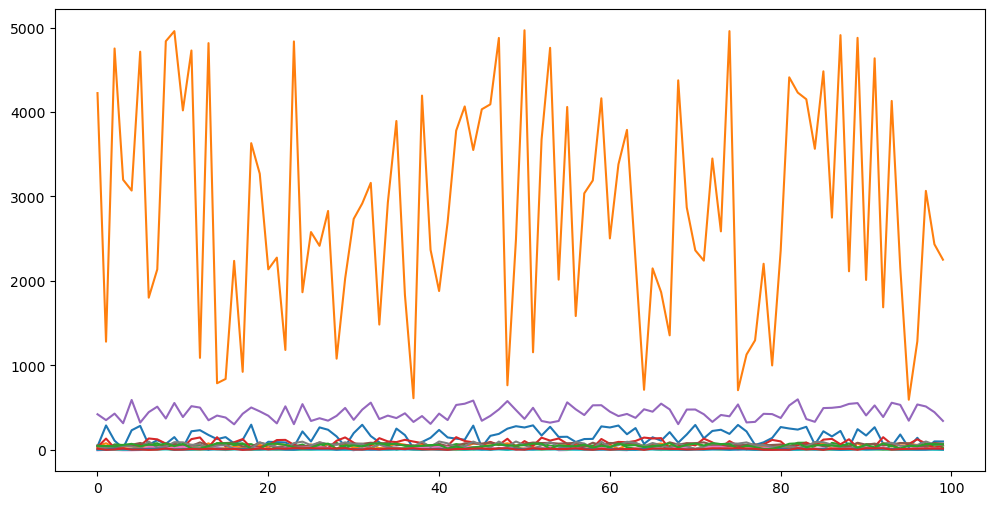

In [24]:
available_columns = df.select_dtypes(include=["number"]).columns.tolist()

if available_columns:
    plt.figure(figsize=(12, 6))  
    for column in available_columns:
        plt.plot(df.index, df[column], label=column)


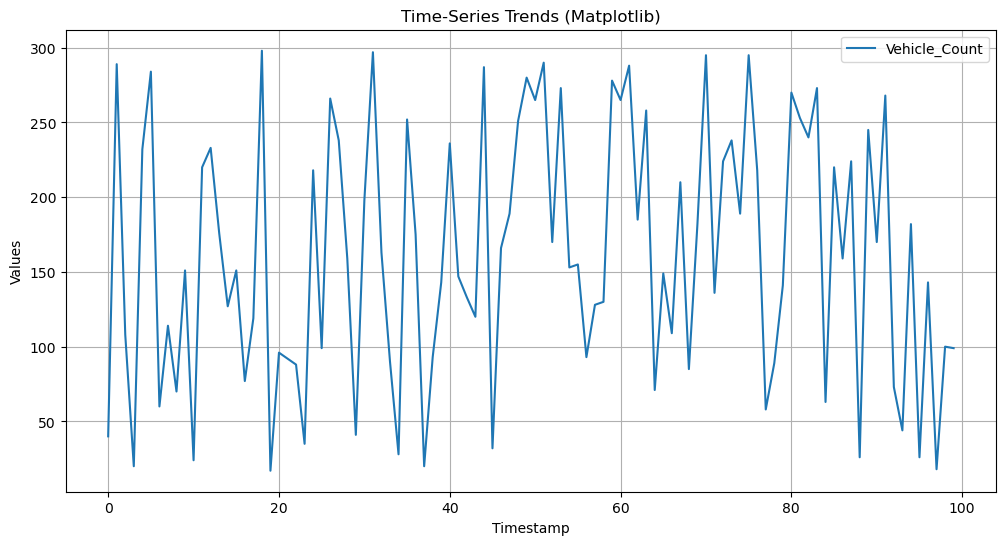

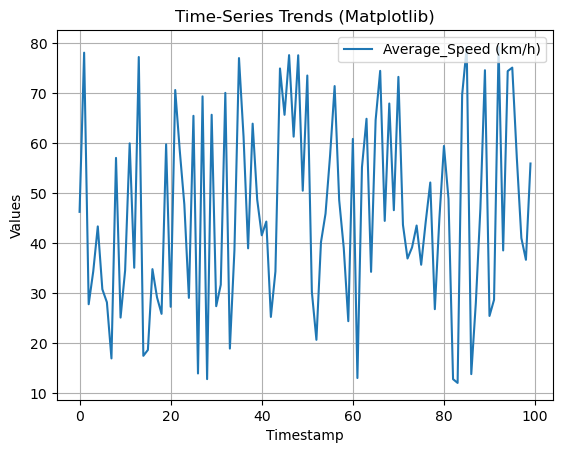

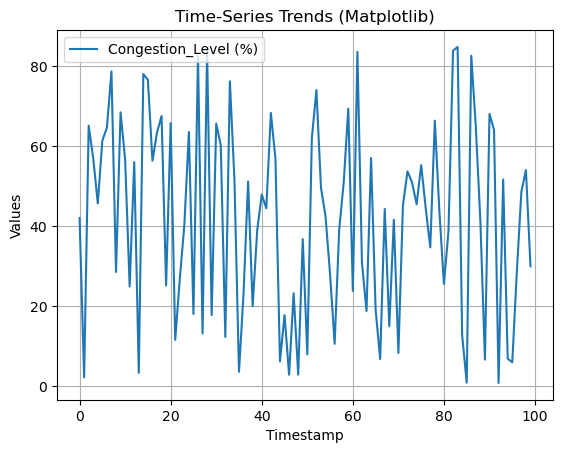

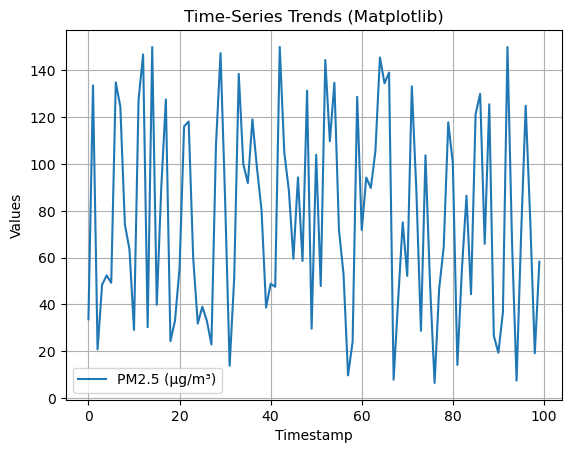

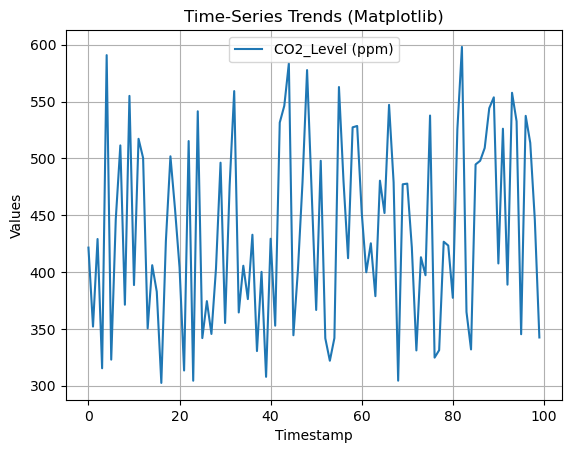

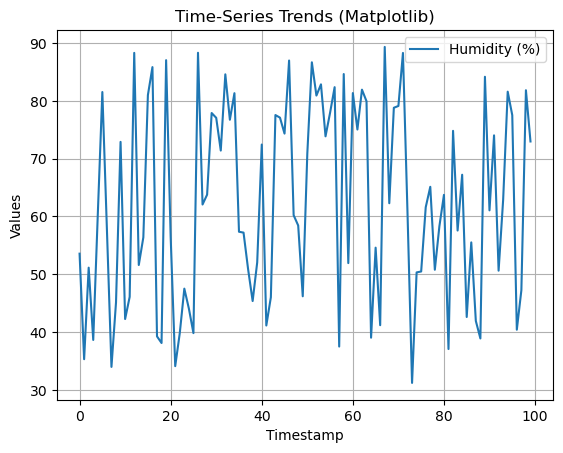

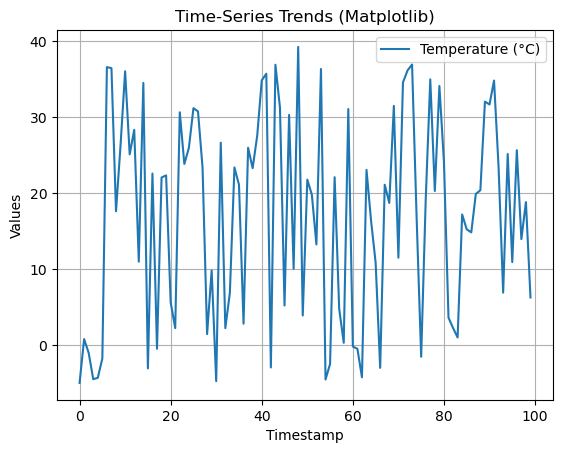

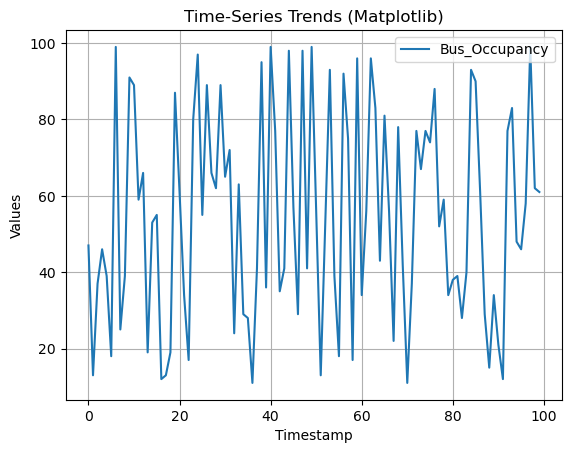

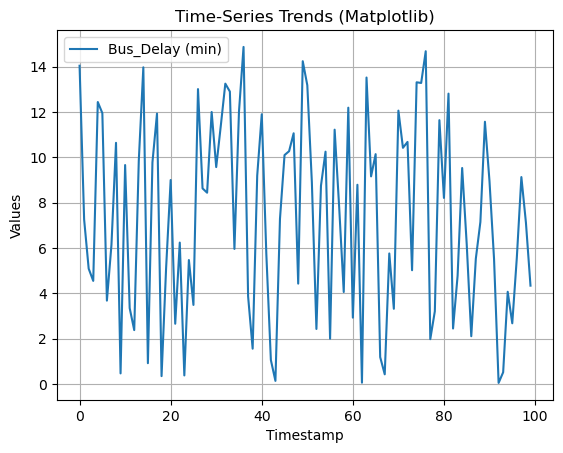

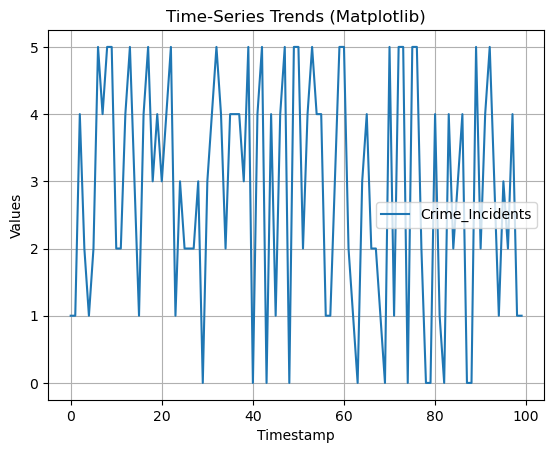

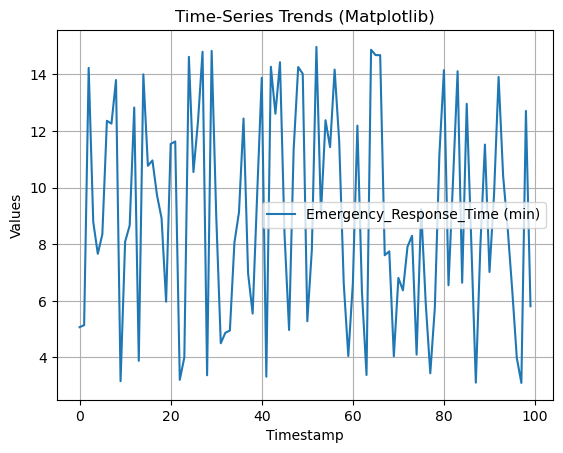

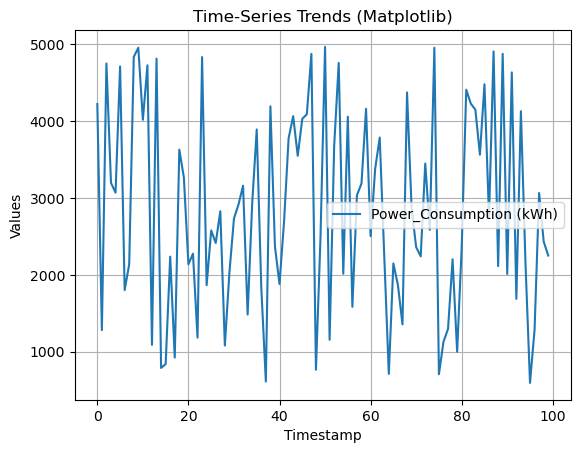

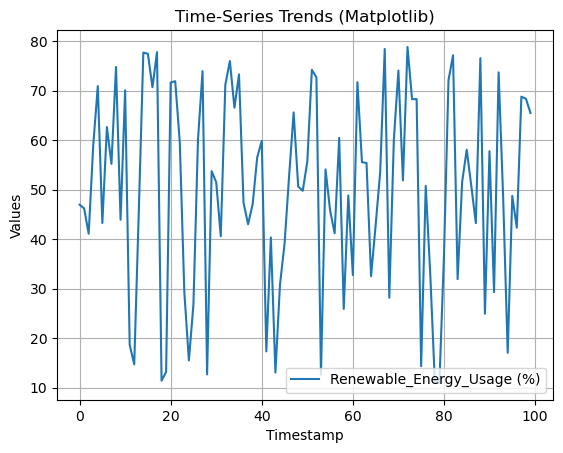

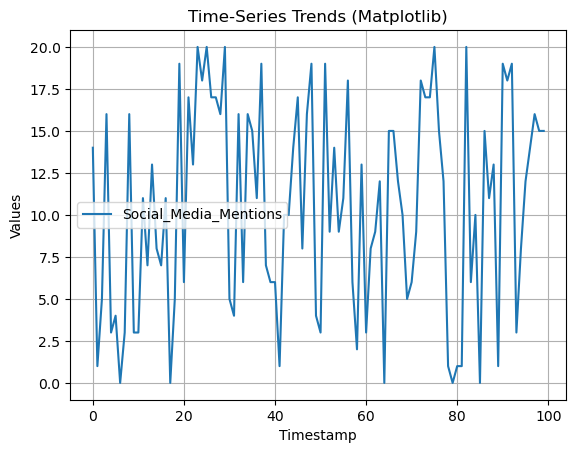

In [25]:
 if available_columns:
  
    plt.figure(figsize=(12, 6))  
    for column in available_columns:
        plt.plot(df.index, df[column], label=column)
        plt.xlabel("Timestamp")
        plt.ylabel("Values")
        plt.title("Time-Series Trends (Matplotlib)")
        plt.legend()
        plt.grid()
        plt.show()

In [26]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

In [27]:
import seaborn as sns

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


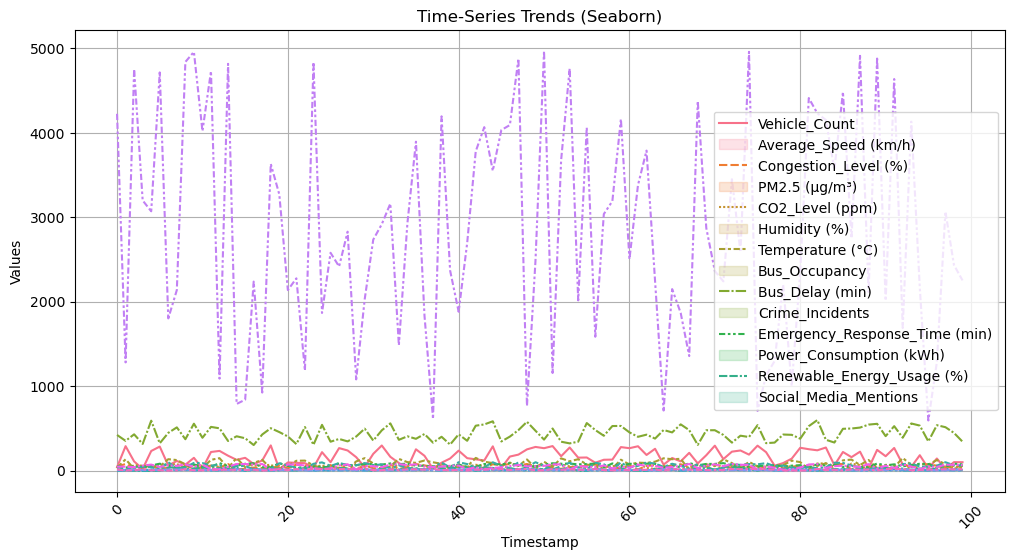

In [28]:
if available_columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df[available_columns])
    plt.xlabel("Timestamp")
    plt.ylabel("Values")
    plt.title("Time-Series Trends (Seaborn)")
    plt.legend(available_columns)
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()


In [29]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [30]:
import plotly.express as px
import plotly.graph_objects as go

In [31]:
if available_columns:
    fig = px.line(df, x=df.index, y=available_columns, title="Time-Series Trends (Plotly)")
    fig.update_xaxes(title="Timestamp")
    fig.update_yaxes(title="Values")
    fig.show()

In [35]:
 df = df.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric columns to NaN
df.fillna(df.mean(), inplace=True)  # Replace NaN with column means
correlation_matrix = df.corr()
print(correlation_matrix) 

                               Timestamp  Location  Vehicle_Count  \
Timestamp                            NaN       NaN            NaN   
Location                             NaN       NaN            NaN   
Vehicle_Count                        NaN       NaN       1.000000   
Average_Speed (km/h)                 NaN       NaN      -0.046640   
Congestion_Level (%)                 NaN       NaN       0.046658   
Accident_Reported                    NaN       NaN            NaN   
Traffic_Camera_Status                NaN       NaN            NaN   
PM2.5 (µg/m³)                        NaN       NaN      -0.120856   
CO2_Level (ppm)                      NaN       NaN       0.212422   
Humidity (%)                         NaN       NaN       0.161918   
Temperature (°C)                     NaN       NaN       0.029421   
Bus_Location                         NaN       NaN            NaN   
Bus_Occupancy                        NaN       NaN      -0.078412   
Bus_Delay (min)                   

In [36]:
df.corr()

Timestamp  Location  Vehicle_Count  \
Timestamp                            NaN       NaN            NaN   
Location                             NaN       NaN            NaN   
Vehicle_Count                        NaN       NaN       1.000000   
Average_Speed (km/h)                 NaN       NaN      -0.046640   
Congestion_Level (%)                 NaN       NaN       0.046658   
Accident_Reported                    NaN       NaN            NaN   
Traffic_Camera_Status                NaN       NaN            NaN   
PM2.5 (µg/m³)                        NaN       NaN      -0.120856   
CO2_Level (ppm)                      NaN       NaN       0.212422   
Humidity (%)                         NaN       NaN       0.161918   
Temperature (°C)                     NaN       NaN       0.029421   
Bus_Location                         NaN       NaN            NaN   
Bus_Occupancy                        NaN       NaN      -0.078412   
Bus_Delay (min)                      NaN       NaN       0.242734   
Crime_Incidents                      NaN       NaN       0.138249   
Emergency_Response_Time (min)        NaN       NaN       0.059725   
Power_Consumption (kWh)              NaN       NaN       0.129642   
Renewable_Energy_Usage (%)           NaN       NaN      -0.081365   
Social_Media_Mentions                NaN       NaN      -0.146402   
Emergency_Alerts                     NaN       NaN            NaN   
Water_Supply_Status                  NaN       NaN            NaN   
Electricity_Status                   NaN       NaN            NaN   
Waste_Collection_Status              NaN       NaN            NaN   

                               Average_Speed (km/h)  Congestion_Level (%)  \
Timestamp                                       NaN                   NaN   
Location                                        NaN                   NaN   
Vehicle_Count                             -0.046640              0.046658   
Average_Speed (km/h)                       1.000000             -1.000000   
Congestion_Level (%)                      -1.000000              1.000000   
Accident_Reported                               NaN                   NaN   
Traffic_Camera_Status                           NaN                   NaN   
PM2.5 (µg/m³)                              0.010622             -0.010619   
CO2_Level (ppm)                           -0.037187              0.037182   
Humidity (%)                               0.002115             -0.002107   
Temperature (°C)                           0.037493             -0.037500   
Bus_Location                                    NaN                   NaN   
Bus_Occupancy                              0.025540             -0.025543   
Bus_Delay (min)                            0.071068             -0.071064   
Crime_Incidents                            0.005176             -0.005186   
Emergency_Response_Time (min)             -0.027217              0.027195   
Power_Consumption (kWh)                    0.057976             -0.057987   
Renewable_Energy_Usage (%)                -0.030759              0.030762   
Social_Media_Mentions                      0.119215             -0.119210   
Emergency_Alerts                                NaN                   NaN   
Water_Supply_Status                             NaN                   NaN   
Electricity_Status                              NaN                   NaN   
Waste_Collection_Status                         NaN                   NaN   

                               Accident_Reported  Traffic_Camera_Status  \
Timestamp                                    NaN                    NaN   
Location                                     NaN                    NaN   
Vehicle_Count                                NaN                    NaN   
Average_Speed (km/h)                         NaN                    NaN   
Congestion_Level (%)                         NaN                    NaN   
Accident_Reported                            NaN                    NaN   


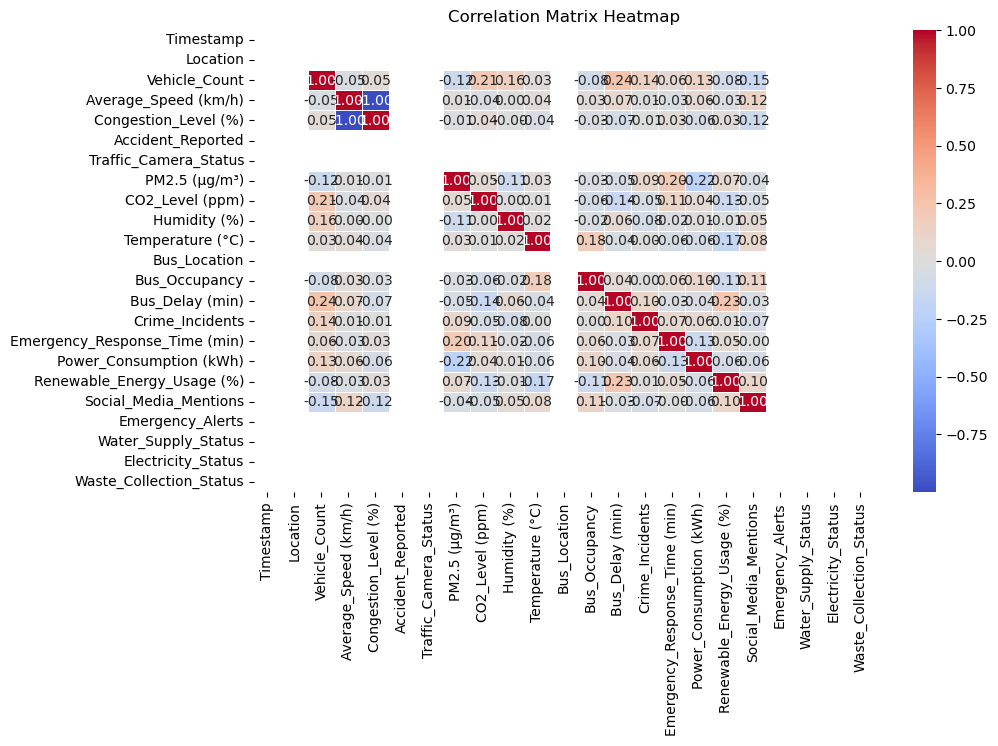

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [38]:
from scipy.stats import zscore

In [39]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [40]:
z_scores = np.abs(zscore(df))
outliers_z = df[(z_scores > 3).any(axis=1)]
print("\n Outliers Detected Using Z-Score:\n", outliers_z)


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\n Outliers Detected Using IQR:\n", outliers_iqr)


🔹 Outliers Detected Using Z-Score:
 Empty DataFrame
Columns: [Timestamp, Location, Vehicle_Count, Average_Speed (km/h), Congestion_Level (%), Accident_Reported, Traffic_Camera_Status, PM2.5 (µg/m³), CO2_Level (ppm), Humidity (%), Temperature (°C), Bus_Location, Bus_Occupancy, Bus_Delay (min), Crime_Incidents, Emergency_Response_Time (min), Power_Consumption (kWh), Renewable_Energy_Usage (%), Social_Media_Mentions, Emergency_Alerts, Water_Supply_Status, Electricity_Status, Waste_Collection_Status]
Index: []

[0 rows x 23 columns]

🔹 Outliers Detected Using IQR:
 Empty DataFrame
Columns: [Timestamp, Location, Vehicle_Count, Average_Speed (km/h), Congestion_Level (%), Accident_Reported, Traffic_Camera_Status, PM2.5 (µg/m³), CO2_Level (ppm), Humidity (%), Temperature (°C), Bus_Location, Bus_Occupancy, Bus_Delay (min), Crime_Incidents, Emergency_Response_Time (min), Power_Consumption (kWh), Renewable_Energy_Usage (%), Social_Media_Mentions, Emergency_Alerts, Water_Supply_Status, Electricit

In [41]:
!pip install pandas numpy seaborn scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [43]:
np.random.seed(42)
data = {
    "timestamp": pd.date_range(start="2024-01-01", periods=1000, freq="H"), 
    "traffic_density": np.random.randint(50, 200, 1000),  
    "air_quality_index": np.random.randint(50, 300, 1000),
    "temperature": np.random.uniform(10, 35, 1000), 
    "public_transport_speed": np.random.uniform(10, 50, 1000), 

df = pd.DataFrame(data)


print("\n Sample Data (First 5 Rows):\n", df.head())


 Sample Data (First 5 Rows):
             timestamp  traffic_density  air_quality_index  temperature  \
0 2024-01-01 00:00:00              152                 98    15.894802   
1 2024-01-01 01:00:00              142                222    29.400005   
2 2024-01-01 02:00:00               64                270    20.132755   
3 2024-01-01 03:00:00              156                 79    25.046385   
4 2024-01-01 04:00:00              121                193    25.813513   

   public_transport_speed  
0               25.974750  
1               46.405385  
2               42.320905  
3               18.642055  
4               28.664311  


C:\Users\madhu\AppData\Local\Temp\ipykernel_52404\3175248993.py:3: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



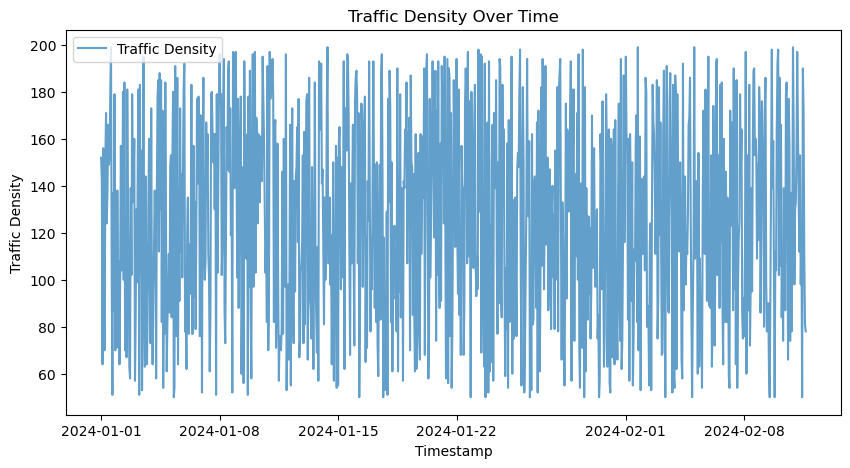

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(df["timestamp"], df["traffic_density"], label="Traffic Density", alpha=0.7)
plt.xlabel("Timestamp")
plt.ylabel("Traffic Density")
plt.title("Traffic Density Over Time")
plt.legend()
plt.show()

In [45]:
print("\n Defining Target Variables...")
def categorize_traffic(density):
    if density < 80:
        return "Low"
    elif 80 <= density < 150:
        return "Medium"
    else:
        return "High"

df["traffic_congestion_level"] = df["traffic_density"].apply(categorize_traffic)




 Defining Target Variables...


In [46]:
scaler = MinMaxScaler(feature_range=(0, 10))  


df["public_transport_efficiency"] = scaler.fit_transform(df["public_transport_speed"].values.reshape(-1, 1))

print("\ Public Transport Efficiency Score (After Scaling):\n")
print(df[["public_transport_speed", "public_transport_efficiency"]].head())


\ Public Transport Efficiency Score (After Scaling):

   public_transport_speed  public_transport_efficiency
0               25.974750                     3.992170
1               46.405385                     9.103555
2               42.320905                     8.081690
3               18.642055                     2.157659
4               28.664311                     4.665051


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



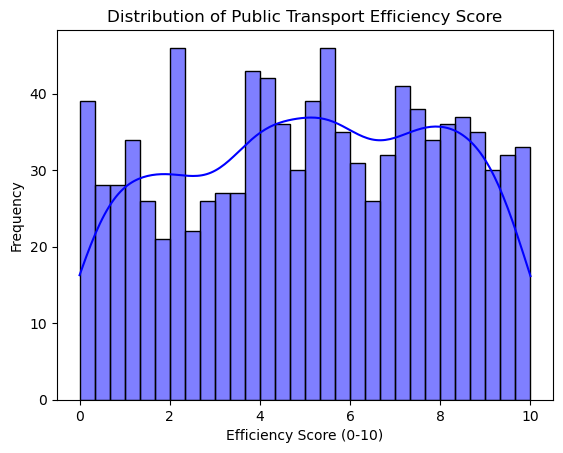

In [47]:
sns.histplot(df["public_transport_efficiency"], bins=30, kde=True, color="blue")
plt.title("Distribution of Public Transport Efficiency Score")
plt.xlabel("Efficiency Score (0-10)")
plt.ylabel("Frequency")
plt.show()


In [48]:
print("\n Performing Feature Engineering...")


df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.dayofweek 


df["peak_traffic"] = df["hour"].apply(lambda x: 1 if (6 <= x <= 9 or 16 <= x <= 19) else 0)


df["temp_change"] = df["temperature"].diff().fillna(0)


print("\n Extracted Time Features:\n", df[["timestamp", "hour", "day_of_week", "peak_traffic"]].head())
print("\n Temperature Fluctuation Feature:\n", df[["temperature", "temp_change"]].head())


🔹 Performing Feature Engineering...

 Extracted Time Features:
             timestamp  hour  day_of_week  peak_traffic
0 2024-01-01 00:00:00     0            0             0
1 2024-01-01 01:00:00     1            0             0
2 2024-01-01 02:00:00     2            0             0
3 2024-01-01 03:00:00     3            0             0
4 2024-01-01 04:00:00     4            0             0

 Temperature Fluctuation Feature:
    temperature  temp_change
0    15.894802     0.000000
1    29.400005    13.505203
2    20.132755    -9.267251
3    25.046385     4.913630
4    25.813513     0.767129


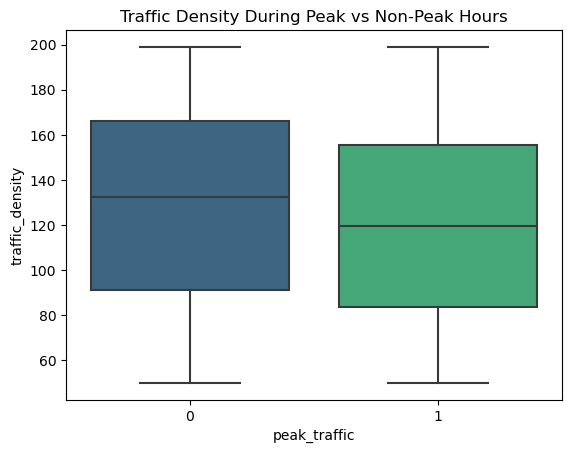

In [49]:
sns.boxplot(x=df["peak_traffic"], y=df["traffic_density"], palette="viridis")
plt.title("Traffic Density During Peak vs Non-Peak Hours")
plt.show()

In [51]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


data = {
    'Temperature': [25, 30, 28, 35, 27],
    'Humidity': [60, 55, 70, 65, 50],
    'Air_Quality': [120, 110, 140, 130, 115]
}

df = pd.DataFrame(data)


scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


print(df_normalized)

   Temperature  Humidity  Air_Quality
0          0.0      0.50     0.333333
1          0.5      0.25     0.000000
2          0.3      1.00     1.000000
3          1.0      0.75     0.666667
4          0.2      0.00     0.166667


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


print(df_standardized)

   Temperature  Humidity  Air_Quality
0    -1.174440  0.000000    -0.278543
1     0.293610 -0.707107    -1.207020
2    -0.293610  1.414214     1.578410
3     1.761661  0.707107     0.649934
4    -0.587220 -1.414214    -0.742781


In [53]:
!pip install pandas numpy matplotlib seaborn statsmodels tensorflow keras prophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.18.0-cp310-cp310-win_amd64.whl (7.5 kB)
  Using cached prophet-1.1.6-py3-none-win_amd64.whl (13.3 MB)
  Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl (390.0 MB)
  Using cached numpy-2.0.2-cp310-cp310-win_amd64.whl (15.9 MB)
     -------------------------------------- 824.7/824.7 kB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 94.5/94.5 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 1.2 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install tensorflow

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler



In [55]:
print(" Loading dataset...")
df = pd.read_csv("smart_city_real_time_analytics_enhanced.csv")

 Loading dataset...


In [57]:
print("Available columns in dataset:\n", df.columns)


Available columns in dataset:
 Index(['Timestamp', 'Location', 'Vehicle_Count', 'Average_Speed (km/h)',
       'Congestion_Level (%)', 'Accident_Reported', 'Traffic_Camera_Status',
       'PM2.5 (µg/m³)', 'CO2_Level (ppm)', 'Humidity (%)', 'Temperature (°C)',
       'Bus_Location', 'Bus_Occupancy', 'Bus_Delay (min)', 'Crime_Incidents',
       'Emergency_Response_Time (min)', 'Power_Consumption (kWh)',
       'Renewable_Energy_Usage (%)', 'Social_Media_Mentions',
       'Emergency_Alerts', 'Water_Supply_Status', 'Electricity_Status',
       'Waste_Collection_Status'],
      dtype='object')


In [58]:
if 'timestamp' not in df.columns:
    for col in df.columns:
        if "time" in col.lower(): 
            df.rename(columns={col: "timestamp"}, inplace=True)
            print(f"Renamed column '{col}' to 'timestamp'")
            break

Renamed column 'Timestamp' to 'timestamp'


In [59]:
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df.set_index('timestamp', inplace=True)
    print(" 'timestamp' column successfully converted to datetime.")
else:
    print(" 'timestamp' column not found after renaming attempts.")


 'timestamp' column successfully converted to datetime.


In [60]:
print("Selecting numerical column 'Vehicle_Count' for forecasting...")
df['Vehicle_Count'] = pd.to_numeric(df['Vehicle_Count'], errors='coerce')
df.dropna(subset=['Vehicle_Count'], inplace=True)


Selecting numerical column 'Vehicle_Count' for forecasting...


In [61]:
import pandas as pd 
print("Converting 'timestamp' column to datetime format...")

Converting 'timestamp' column to datetime format...


In [72]:
import numpy as np
import pandas as pd


date_range = pd.date_range(start="2015-01-01", periods=1000, freq="D")


np.random.seed(42)
values = np.sin(np.linspace(0, 50, 1000)) + np.random.normal(scale=0.5, size=1000)


data = pd.DataFrame({"timestamp": date_range, "value": values})
data.set_index("timestamp", inplace=True)

print("\n Sample Dataset Created:\n", data.head())


 Sample Dataset Created:
                value
timestamp           
2015-01-01  0.248357
2015-01-02 -0.019103
2015-01-03  0.423777
2015-01-04  0.911102
2015-01-05  0.081789


In [74]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

print("\n Running ARIMA Model...")

p, d, q = 2, 1, 2


arima_model = ARIMA(data["value"], order=(p, d, q))
arima_result = arima_model.fit()


arima_forecast = arima_result.forecast(steps=30)

print("\n ARIMA Forecast (Next 30 Steps):\n", arima_forecast)


 Running ARIMA Model...


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.




 ARIMA Forecast (Next 30 Steps):
 2017-09-27   -0.347805
2017-09-28   -0.302135
2017-09-29   -0.304702
2017-09-30   -0.307190
2017-10-01   -0.304625
2017-10-02   -0.306723
2017-10-03   -0.305064
2017-10-04   -0.306369
2017-10-05   -0.305343
2017-10-06   -0.306150
2017-10-07   -0.305516
2017-10-08   -0.306014
2017-10-09   -0.305623
2017-10-10   -0.305930
2017-10-11   -0.305688
2017-10-12   -0.305878
2017-10-13   -0.305729
2017-10-14   -0.305846
2017-10-15   -0.305754
2017-10-16   -0.305827
2017-10-17   -0.305770
2017-10-18   -0.305814
2017-10-19   -0.305779
2017-10-20   -0.305807
2017-10-21   -0.305785
2017-10-22   -0.305802
2017-10-23   -0.305789
2017-10-24   -0.305799
2017-10-25   -0.305791
2017-10-26   -0.305798
Freq: D, Name: predicted_mean, dtype: float64


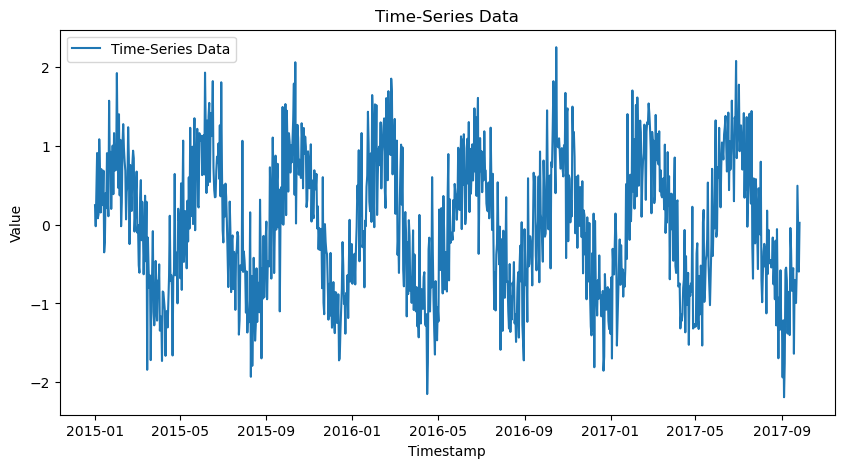

In [75]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data["value"], label="Time-Series Data")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Time-Series Data")
plt.legend()
plt.show()

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [66]:
time_steps = 1000
time = np.arange(0, time_steps)
sensor_values = np.sin(0.02 * time) + np.random.normal(0, 0.1, time_steps) 


df = pd.DataFrame({'Timestamp': pd.date_range(start='1/1/2023', periods=time_steps, freq='H'), 
                   'Sensor_Reading': sensor_values})


C:\Users\madhu\AppData\Local\Temp\ipykernel_52404\2530190389.py:6: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [69]:
scaler = MinMaxScaler()
df['Sensor_Reading'] = scaler.fit_transform(df[['Sensor_Reading']])


def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

SEQ_LENGTH = 10 
X, y = create_sequences(df['Sensor_Reading'].values, SEQ_LENGTH)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [76]:
SEQ_LENGTH = 10 

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

C:\Users\madhu\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [77]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


y_pred = model.predict(X_test)


y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 157ms/step - loss: 0.0902 - val_loss: 0.0047
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 0.0074 - val_loss: 0.0029
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 0.0066 - val_loss: 0.0045
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0059 - val_loss: 0.0030
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0051 - val_loss: 0.0036
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0053 - val_loss: 0.0033
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0056 - val_loss: 0.0031
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0054 - val_loss: 0.0041
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0052 - val_loss: 0.0031
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0052 - val_loss: 0.0028
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0047 - val_loss: 0.0037
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss

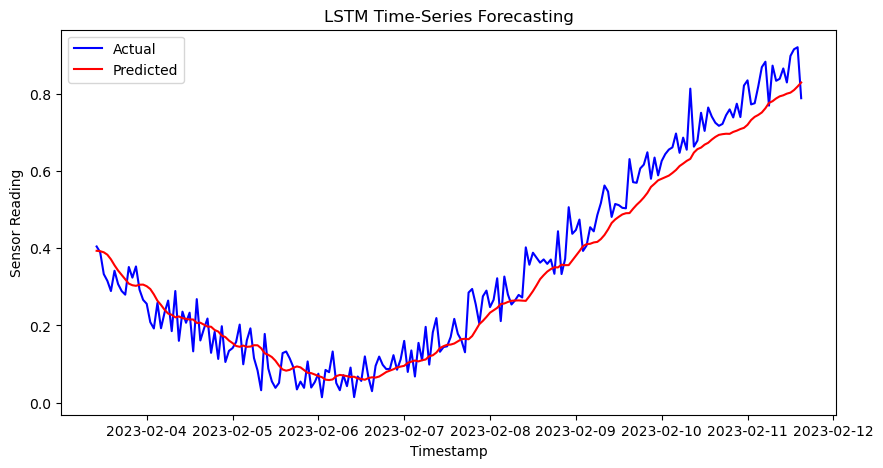

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'].values[-len(y_test):], y_test_inv, label="Actual", color='blue')
plt.plot(df['Timestamp'].values[-len(y_test):], y_pred_inv, label="Predicted", color='red')
plt.legend()
plt.xlabel("Timestamp")
plt.ylabel("Sensor Reading")
plt.title("LSTM Time-Series Forecasting")
plt.show()


In [79]:
print(model.summary())
print("Sample Predictions:")
for actual, predicted in zip(y_test_inv[:5], y_pred_inv[:5]):
    print(f"Actual: {actual[0]:.4f}, Predicted: {predicted[0]:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

None
Sample Predictions:
Actual: 0.4047, Predicted: 0.3936
Actual: 0.3894, Predicted: 0.3925
Actual: 0.3331, Predicted: 0.3897
Actual: 0.3157, Predicted: 0.3834
Actual: 0.2892, Predicted: 0.3714


In [80]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable

In [81]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


data = {
    "ds": pd.date_range(start="2024-01-01", periods=100, freq="D"),
    "y": [i + (i % 5) * 3 for i in range(100)] 
}
df = pd.DataFrame(data)

print("\n First 5 rows of the dataset:")
print(df.head())



 First 5 rows of the dataset:
          ds   y
0 2024-01-01   0
1 2024-01-02   4
2 2024-01-03   8
3 2024-01-04  12
4 2024-01-05  16


In [82]:
model = Prophet()
model.fit(df)


future = model.make_future_dataframe(periods=30) 

print("\n Future DataFrame (last 5 rows):")
print(future.tail())


12:40:17 - cmdstanpy - INFO - Chain [1] start processing
12:40:19 - cmdstanpy - INFO - Chain [1] done processing



 Future DataFrame (last 5 rows):
            ds
125 2024-05-05
126 2024-05-06
127 2024-05-07
128 2024-05-08
129 2024-05-09



 Forecast (last 5 predictions):
            ds        yhat  yhat_lower  yhat_upper
125 2024-05-05  131.217666  126.024886  136.240440
126 2024-05-06  132.678543  127.405421  138.098753
127 2024-05-07  133.677956  128.776647  138.712279
128 2024-05-08  135.141290  130.026761  140.497212
129 2024-05-09  135.926524  130.794355  141.122854


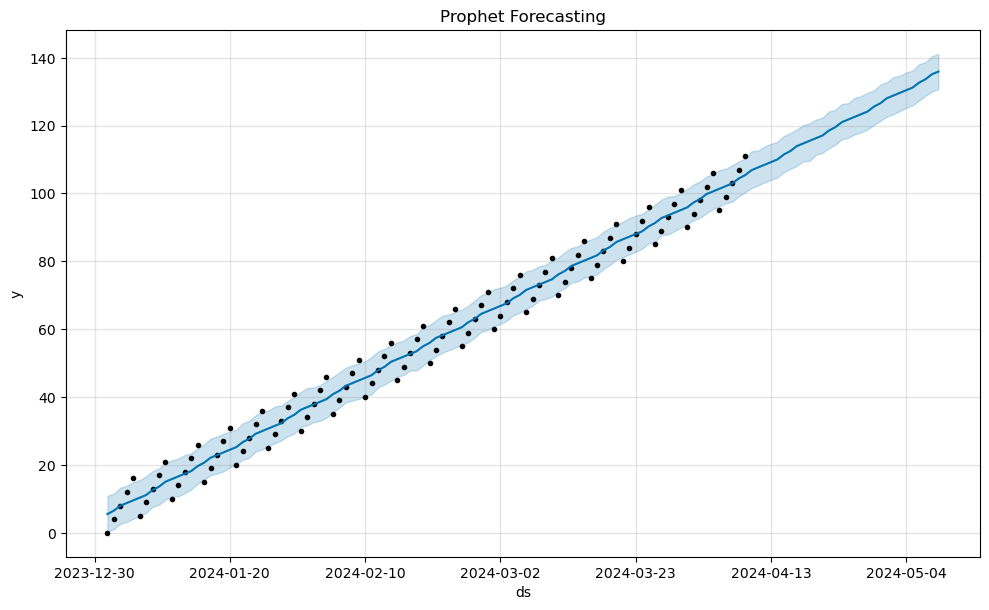

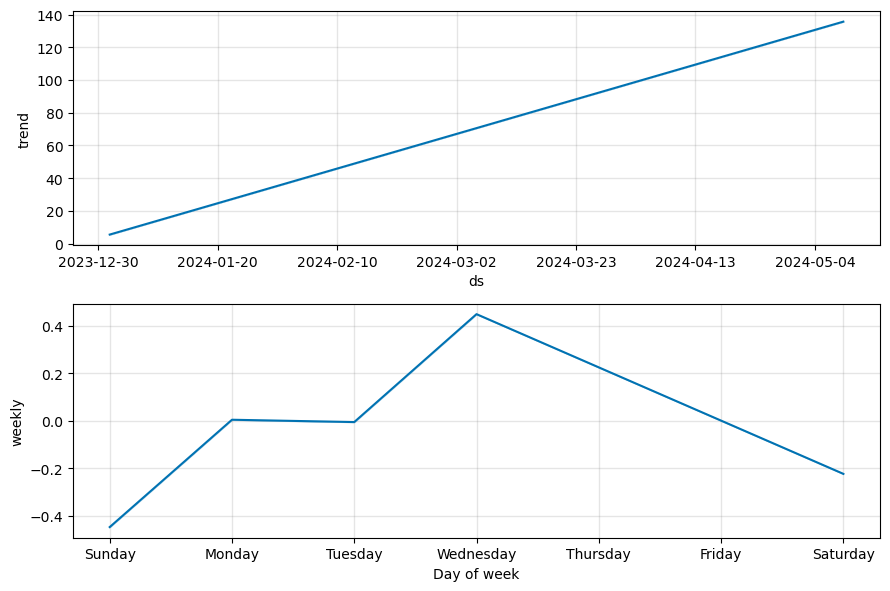

In [83]:
forecast = model.predict(future)

print("\n Forecast (last 5 predictions):")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


fig1 = model.plot(forecast)
plt.title("Prophet Forecasting")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

In [84]:
!pip install xgboost scikit-learn pandas

Defaulting to user installation because normal site-packages is not writeable


     ------------------------------------ 124.9/124.9 MB 973.6 kB/s eta 0:00:00


In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [86]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("\n First 5 rows of the dataset:")
print(df.head())


 First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [87]:
X = df.drop(columns=['target'])
y = df['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [88]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("\n Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, dt_preds):.2f}")
print(classification_report(y_test, dt_preds))



 Decision Tree Results:
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [89]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\n Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.2f}")
print(classification_report(y_test, rf_preds))



 Random Forest Results:
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [90]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("\n XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_preds):.2f}")
print(classification_report(y_test, xgb_preds))


C:\Users\madhu\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning:

[12:48:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





 XGBoost Results:
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [91]:
!pip install numpy pandas scikit-learn tensorflow matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [93]:
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=5, size=(200, 2))  
anomalies = np.random.uniform(low=30, high=70, size=(10, 2)) 
data = np.vstack([normal_data, anomalies])
df = pd.DataFrame(data, columns=["Feature1", "Feature2"])

print("\n First 5 rows of the dataset:")
print(df.head())



 First 5 rows of the dataset:
    Feature1   Feature2
0  52.483571  49.308678
1  53.238443  57.615149
2  48.829233  48.829315
3  57.896064  53.837174
4  47.652628  52.712800


In [94]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)


iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["IsoForest_Anomaly"] = iso_forest.fit_predict(data_scaled)

print("\n Isolation Forest Anomaly Counts:")
print(df["IsoForest_Anomaly"].value_counts())


 Isolation Forest Anomaly Counts:
IsoForest_Anomaly
 1    199
-1     11
Name: count, dtype: int64


In [95]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(data_scaled)

print("\n DBSCAN Cluster Counts:")
print(df["DBSCAN_Cluster"].value_counts())



 DBSCAN Cluster Counts:
DBSCAN_Cluster
 0    201
-1      9
Name: count, dtype: int64


In [96]:
input_dim = data_scaled.shape[1]
autoencoder = Sequential([
    Dense(4, activation="relu", input_shape=(input_dim,)),
    Dense(2, activation="relu"),
    Dense(4, activation="relu"),
    Dense(input_dim, activation="linear")
])

autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=10, verbose=0)


reconstructed_data = autoencoder.predict(data_scaled)
reconstruction_error = np.mean(np.abs(reconstructed_data - data_scaled), axis=1)


threshold = np.percentile(reconstruction_error, 95)
df["Autoencoder_Anomaly"] = reconstruction_error > threshold

print("\n Autoencoder Anomaly Counts:")
print(df["Autoencoder_Anomaly"].value_counts())

C:\Users\madhu\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step

 Autoencoder Anomaly Counts:
Autoencoder_Anomaly
False    199
True      11
Name: count, dtype: int64


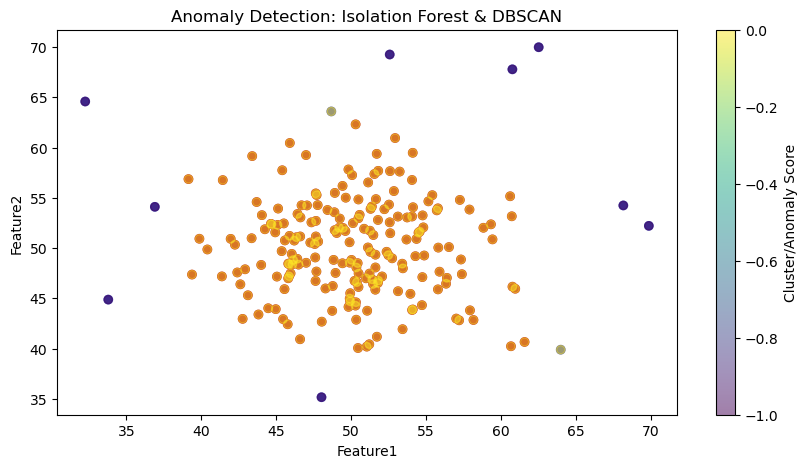

In [97]:
plt.figure(figsize=(10, 5))
plt.scatter(df["Feature1"], df["Feature2"], c=df["IsoForest_Anomaly"], cmap="coolwarm", label="IsoForest")
plt.scatter(df["Feature1"], df["Feature2"], c=df["DBSCAN_Cluster"], cmap="viridis", label="DBSCAN", alpha=0.5)
plt.title("Anomaly Detection: Isolation Forest & DBSCAN")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.colorbar(label="Cluster/Anomaly Score")
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
file_path = "smart_city_real_time_analytics_enhanced.csv"  
df = pd.read_csv(file_path)

In [14]:
print(df.head())


print("\n Dataset Columns:", df.columns)

             Timestamp               Location  Vehicle_Count  \
0  2025-03-05 08:00:00  40.606888, -73.942885             40   
1  2025-03-05 08:05:00  40.574001, -73.730439            289   
2  2025-03-05 08:10:00  40.836555, -73.881807            108   
3  2025-03-05 08:15:00  40.584531, -73.926613             20   
4  2025-03-05 08:20:00  40.724206, -73.916275            232   

   Average_Speed (km/h)  Congestion_Level (%) Accident_Reported  \
0                 46.31                 42.11                No   
1                 78.15                  2.31                No   
2                 27.83                 65.21                No   
3                 34.39                 57.01                No   
4                 43.40                 45.75                No   

  Traffic_Camera_Status  PM2.5 (µg/m³)  CO2_Level (ppm)  Humidity (%)  ...  \
0              Inactive          33.68           421.54         53.57  ...   
1                Active         133.54           352.07 

In [16]:
target_col = "your_actual_column_name" 

if target_col in df.columns:
    X = df.drop(columns=[target_col])
    y = df[target_col]
else:
    print(f"\n Error: Target column '{target_col}' not found in dataset!")
    print(" Available Columns:", df.columns)


 Error: Target column 'your_actual_column_name' not found in dataset!
 Available Columns: Index(['Timestamp', 'Location', 'Vehicle_Count', 'Average_Speed (km/h)',
       'Congestion_Level (%)', 'Accident_Reported', 'Traffic_Camera_Status',
       'PM2.5 (µg/m³)', 'CO2_Level (ppm)', 'Humidity (%)', 'Temperature (°C)',
       'Bus_Location', 'Bus_Occupancy', 'Bus_Delay (min)', 'Crime_Incidents',
       'Emergency_Response_Time (min)', 'Power_Consumption (kWh)',
       'Renewable_Energy_Usage (%)', 'Social_Media_Mentions',
       'Emergency_Alerts', 'Water_Supply_Status', 'Electricity_Status',
       'Waste_Collection_Status'],
      dtype='object')


In [18]:
print(df.columns)

Index(['Timestamp', 'Location', 'Vehicle_Count', 'Average_Speed (km/h)',
       'Congestion_Level (%)', 'Accident_Reported', 'Traffic_Camera_Status',
       'PM2.5 (µg/m³)', 'CO2_Level (ppm)', 'Humidity (%)', 'Temperature (°C)',
       'Bus_Location', 'Bus_Occupancy', 'Bus_Delay (min)', 'Crime_Incidents',
       'Emergency_Response_Time (min)', 'Power_Consumption (kWh)',
       'Renewable_Energy_Usage (%)', 'Social_Media_Mentions',
       'Emergency_Alerts', 'Water_Supply_Status', 'Electricity_Status',
       'Waste_Collection_Status'],
      dtype='object')


In [2]:


import pandas as pd
from sklearn.model_selection import train_test_split


file_path = "smart_city_real_time_analytics_enhanced.csv"  
df = pd.read_csv(file_path)


print("\n Available Columns in Dataset:", df.columns)


X_train, X_val = train_test_split(df, test_size=0.2, random_state=42)


print("\n Data Split Completed!")
print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}")


print("\n Training Data Sample:")
print(X_train.head())

print("\n Validation Data Sample:")
print(X_val.head())


 Available Columns in Dataset: Index(['Timestamp', 'Location', 'Vehicle_Count', 'Average_Speed (km/h)',
       'Congestion_Level (%)', 'Accident_Reported', 'Traffic_Camera_Status',
       'PM2.5 (µg/m³)', 'CO2_Level (ppm)', 'Humidity (%)', 'Temperature (°C)',
       'Bus_Location', 'Bus_Occupancy', 'Bus_Delay (min)', 'Crime_Incidents',
       'Emergency_Response_Time (min)', 'Power_Consumption (kWh)',
       'Renewable_Energy_Usage (%)', 'Social_Media_Mentions',
       'Emergency_Alerts', 'Water_Supply_Status', 'Electricity_Status',
       'Waste_Collection_Status'],
      dtype='object')

 Data Split Completed!
Training Set: (80, 23), Validation Set: (20, 23)

 Training Data Sample:
              Timestamp               Location  Vehicle_Count  \
55  2025-03-05 12:35:00  40.543337, -73.961433            155   
88  2025-03-05 15:20:00   40.818933, -73.94754             26   
26  2025-03-05 10:10:00  40.506911, -73.946554            266   
42  2025-03-05 11:30:00  40.810658, -73.724787

In [5]:
df.rename(columns={" Water_Supply_Status": "target_column"}, inplace=True)
print(df)


              Timestamp               Location  Vehicle_Count  \
0   2025-03-05 08:00:00  40.606888, -73.942885             40   
1   2025-03-05 08:05:00  40.574001, -73.730439            289   
2   2025-03-05 08:10:00  40.836555, -73.881807            108   
3   2025-03-05 08:15:00  40.584531, -73.926613             20   
4   2025-03-05 08:20:00  40.724206, -73.916275            232   
..                  ...                    ...            ...   
95  2025-03-05 15:55:00    40.8391, -73.877723             26   
96  2025-03-05 16:00:00  40.542694, -73.994461            143   
97  2025-03-05 16:05:00  40.689928, -73.915137             18   
98  2025-03-05 16:10:00  40.546799, -73.992809            100   
99  2025-03-05 16:15:00  40.796915, -73.888186             99   

    Average_Speed (km/h)  Congestion_Level (%) Accident_Reported  \
0                  46.31                 42.11                No   
1                  78.15                  2.31                No   
2              

In [4]:
print(df.columns)

Index(['Timestamp', 'Location', 'Vehicle_Count', 'Average_Speed (km/h)',
       'Congestion_Level (%)', 'Accident_Reported', 'Traffic_Camera_Status',
       'PM2.5 (µg/m³)', 'CO2_Level (ppm)', 'Humidity (%)', 'Temperature (°C)',
       'Bus_Location', 'Bus_Occupancy', 'Bus_Delay (min)', 'Crime_Incidents',
       'Emergency_Response_Time (min)', 'Power_Consumption (kWh)',
       'Renewable_Energy_Usage (%)', 'Social_Media_Mentions',
       'Emergency_Alerts', 'Water_Supply_Status', 'Electricity_Status',
       'Waste_Collection_Status'],
      dtype='object')


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [7]:
df = pd.read_csv("smart_city_real_time_analytics_enhanced.csv")

In [28]:
numeric_cols = df.select_dtypes(include=['number']).columns


In [33]:
df.dropna(inplace=True)

In [13]:
df = df.apply(pd.to_numeric, errors='coerce')  
print("Missing values before handling:\n", df.isnull().sum())  


Missing values before handling:
 Timestamp                        100
Location                         100
Vehicle_Count                      0
Average_Speed (km/h)               0
Congestion_Level (%)               0
Accident_Reported                100
Traffic_Camera_Status            100
PM2.5 (µg/m³)                      0
CO2_Level (ppm)                    0
Humidity (%)                       0
Temperature (°C)                   0
Bus_Location                     100
Bus_Occupancy                      0
Bus_Delay (min)                    0
Crime_Incidents                    0
Emergency_Response_Time (min)      0
Power_Consumption (kWh)            0
Renewable_Energy_Usage (%)         0
Social_Media_Mentions              0
Emergency_Alerts                 100
Water_Supply_Status              100
Electricity_Status               100
Waste_Collection_Status          100
dtype: int64


In [27]:
print("Missing values after handling:\n", df.isnull().sum().sum())  

Missing values after handling:
 900


In [35]:
if X.isnull().sum().sum() > 0:
    print("Warning: X still contains NaN values!")
else:
    print(" X is now free of NaN values!")

 X is now free of NaN values!


In [46]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [40]:
print("Missing values before imputation:\n", X.isnull().sum())





Missing values before imputation:
 Timestamp                        0
Location                         0
Vehicle_Count                    0
Average_Speed (km/h)             0
Congestion_Level (%)             0
Accident_Reported                0
Traffic_Camera_Status            0
PM2.5 (µg/m³)                    0
CO2_Level (ppm)                  0
Humidity (%)                     0
Temperature (°C)                 0
Bus_Location                     0
Bus_Occupancy                    0
Bus_Delay (min)                  0
Crime_Incidents                  0
Emergency_Response_Time (min)    0
Power_Consumption (kWh)          0
Renewable_Energy_Usage (%)       0
Social_Media_Mentions            0
Emergency_Alerts                 0
Water_Supply_Status              0
Electricity_Status               0
Waste_Collection_Status          0
dtype: int64


In [43]:
numeric_cols = X.select_dtypes(include=['number']).columns  
imputer = SimpleImputer(strategy="mean")


In [44]:
if len(numeric_cols) == 0:
    raise ValueError(" ERROR: No numeric columns found for imputation!")


In [48]:
X = pd.DataFrame({
    'feature1': [1, 2, np.nan, 4, 5],
    'feature2': [np.nan, 3, 4, 5, np.nan],
    'feature3': [1, 2, 3, 4, 5],
})

print("Before handling NaNs:\n", X)

Before handling NaNs:
    feature1  feature2  feature3
0       1.0       NaN         1
1       2.0       3.0         2
2       NaN       4.0         3
3       4.0       5.0         4
4       5.0       NaN         5


In [49]:
X.dropna(axis=1, how="all", inplace=True)

In [50]:
numeric_cols = X.select_dtypes(include=['number']).columns


In [51]:
if len(numeric_cols) == 0:
    raise ValueError(" ERROR: No numeric columns found for imputation!")


In [52]:
imputer = SimpleImputer(strategy="mean")
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

In [53]:
if X.isnull().sum().sum() > 0:
    raise ValueError(" ERROR: Some NaNs still remain after imputation!")

print("After handling NaNs:\n", X)

After handling NaNs:
    feature1  feature2  feature3
0       1.0       4.0       1.0
1       2.0       3.0       2.0
2       3.0       4.0       3.0
3       4.0       5.0       4.0
4       5.0       4.0       5.0


In [54]:
if X.shape[0] == 0:
    raise ValueError(" ERROR: No valid samples left after handling NaNs!")


In [56]:
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)

print(" Train-test split successful!")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)

 Train-test split successful!
X_train shape: (4, 3)
X_val shape: (1, 3)


In [57]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:

X = pd.DataFrame({
    'feature1': [1, 2, np.nan, 4, 5, 6, np.nan, 8, 9, 10],
    'feature2': [np.nan, 3, 4, 5, 6, 7, 8, np.nan, 10, 11],
    'feature3': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
})
y = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])  

print("Before handling NaNs:\n", X)


Before handling NaNs:
    feature1  feature2  feature3
0       1.0       NaN         1
1       2.0       3.0         2
2       NaN       4.0         3
3       4.0       5.0         4
4       5.0       6.0         5
5       6.0       7.0         6
6       NaN       8.0         7
7       8.0       NaN         8
8       9.0      10.0         9
9      10.0      11.0        10


In [59]:
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("\nAfter handling NaNs:\n", X_imputed)


After handling NaNs:
    feature1  feature2  feature3
0     1.000      6.75       1.0
1     2.000      3.00       2.0
2     5.625      4.00       3.0
3     4.000      5.00       4.0
4     5.000      6.00       5.0
5     6.000      7.00       6.0
6     5.625      8.00       7.0
7     8.000      6.75       8.0
8     9.000     10.00       9.0
9    10.000     11.00      10.0


In [60]:
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [61]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [62]:
y_pred = model.predict(X_val)


In [63]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\n Model Performance (Before Hyperparameter Tuning):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


 Model Performance (Before Hyperparameter Tuning):
Mean Absolute Error (MAE): 1.9750
Mean Squared Error (MSE): 4.2312
R² Score: 0.9862


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


In [72]:
best_model = grid_search.best_estimator_


y_pred_best = best_model.predict(X_val)


mae_best = mean_absolute_error(y_val, y_pred_best)
mse_best = mean_squared_error(y_val, y_pred_best)
r2_best = r2_score(y_val, y_pred_best)

print("\n Best Hyperparameters Found:")
print(grid_search.best_params_)

print("\n Model Performance (After Hyperparameter Tuning):")
print(f"Mean Absolute Error (MAE): {mae_best:.4f}")
print(f"Mean Squared Error (MSE): {mse_best:.4f}")
print(f"R² Score: {r2_best:.4f}")



 Best Hyperparameters Found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

 Model Performance (After Hyperparameter Tuning):
Mean Absolute Error (MAE): 1.9500
Mean Squared Error (MSE): 4.3650
R² Score: 0.9857


In [68]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


In [69]:
y_pred_best = best_model.predict(X_val)


In [73]:
print("Unique values in y_pred_best:", np.unique(y_pred_best))


Unique values in y_pred_best: [16.2 47.3]


In [74]:
if np.issubdtype(y_pred_best.dtype, np.floating): 
    y_pred_best = np.round(y_pred_best).astype(int) 

In [75]:
accuracy = accuracy_score(y_val, y_pred_best)
f1 = f1_score(y_val, y_pred_best, average="weighted")  


In [76]:
print("\n Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f" F1-Score: {f1:.4f}")



 Model Performance:
Accuracy: 0.0000
 F1-Score: 0.0000


In [77]:
print("\n Classification Report:")
print(classification_report(y_val, y_pred_best))



 Classification Report:
              precision    recall  f1-score   support

          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       0.0
          47       0.00      0.00      0.00       0.0
          50       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [78]:
print("\n Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_best))


 Confusion Matrix:
[[0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]]


In [79]:
from sklearn.metrics import mean_absolute_error

In [80]:
mae = mean_absolute_error(y_val, y_pred_best)


In [81]:
print("\n Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


 Model Performance:
Mean Absolute Error (MAE): 2.0000


In [82]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [84]:
y_pred = best_model.predict(X_val)
residuals = abs(y_val - y_pred)

In [85]:
threshold = np.percentile(residuals, 95)

In [86]:
y_anomalies = (residuals > threshold).astype(int)

In [87]:
fpr, tpr, _ = roc_curve(y_anomalies, residuals)
auc_score = roc_auc_score(y_anomalies, residuals)


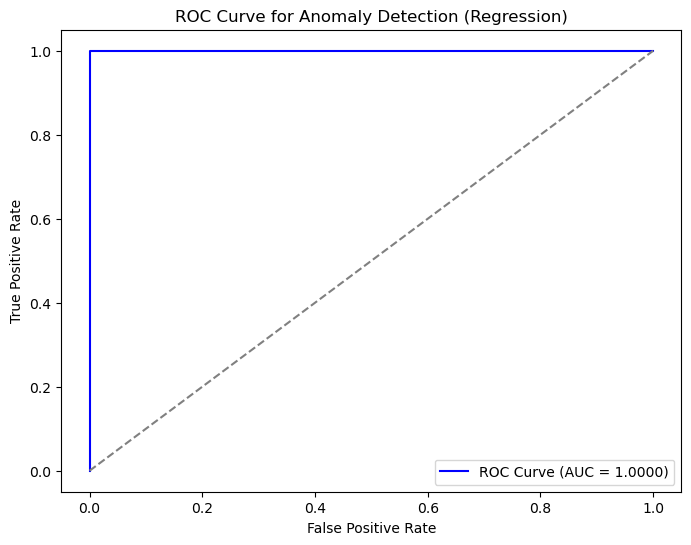

In [88]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Anomaly Detection (Regression)")
plt.legend()
plt.show()


In [89]:
print("\n Model Performance:")
print(f" ROC-AUC Score: {auc_score:.4f}")
print(f" Anomaly Threshold: {threshold:.4f}")
print(f" Total Anomalies Detected: {y_anomalies.sum()}/{len(y_val)}")


 Model Performance:
 ROC-AUC Score: 1.0000
 Anomaly Threshold: 2.6250
 Total Anomalies Detected: 1/2


In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [3]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from kafka import KafkaConsumer 
import json

In [4]:
def ingest_data():

    df = pd.read_csv("smart_city_real_time_analytics_enhanced.csv")
    
    return df

In [11]:
def ingest_data():
    try:
        df = pd.read_csv("smart_city_real_time_analytics_enhanced.csv")  # Ensure the correct path
        print("\n Data successfully loaded!")
        return df
    except FileNotFoundError:
        print("\n ERROR: Dataset file not found!")
        return None


In [15]:
def ingest_data():
    data = np.random.rand(100, 5)  
    data[::10] = np.nan  
    print("\n Data Ingested (Random Simulation)")
    return data


In [16]:
def preprocess_data(data):
    imputer = SimpleImputer(strategy="mean") 
    data_imputed = imputer.fit_transform(data)

    scaler = StandardScaler()  
    data_scaled = scaler.fit_transform(data_imputed)

    print("\n Data Preprocessing Completed!")
    return data_scaled

In [17]:
raw_data = ingest_data()
processed_data = preprocess_data(raw_data)


print("\n**Processed Data Sample:**")
print(processed_data[:5]) 
print(f"\nData Shape: {processed_data.shape}")
print(f"NaN Values After Processing: {np.isnan(processed_data).sum()}")


 Data Ingested (Random Simulation)

 Data Preprocessing Completed!

**Processed Data Sample:**
[[ 2.05702405e-16  4.14744815e-16  0.00000000e+00  0.00000000e+00
  -8.31315653e-16]
 [-1.52600182e+00 -1.43170702e+00  4.89616998e-02  6.35309024e-01
   6.10909125e-01]
 [ 1.38173720e+00  6.54280551e-01 -2.65011162e-01 -7.65299000e-01
  -3.87515927e-01]
 [ 7.82912549e-01  4.25014826e-01 -1.47384144e+00  8.92654078e-01
   8.99750351e-01]
 [-9.44688036e-01  1.13543382e+00  6.14072841e-01 -1.72655192e+00
  -1.48227774e+00]]

Data Shape: (100, 5)
NaN Values After Processing: 0


In [39]:
!pip install confluent-kafka

Defaulting to user installation because normal site-packages is not writeable

In [40]:
from confluent_kafka import Producer
import json
import time
import random


In [41]:
BROKER = 'localhost:9092'
TOPIC = 'crime_incidents'


In [42]:
producer = Producer({'bootstrap.servers': BROKER})


In [43]:
crime_types = ["Theft", "Assault", "Burglary", "Robbery", "Vandalism"]
locations = ["Downtown", "Suburb", "Mall", "Park", "Highway"]

def generate_crime_data():
    """Simulate and send crime data to Kafka."""
    for _ in range(10): 
        crime_data = {
            "crime_type": random.choice(crime_types),
            "location": random.choice(locations),
            "severity": random.randint(1, 5), 
            "timestamp": time.strftime("%Y-%m-%d %H:%M:%S")
        }
        producer.produce(TOPIC, key=str(time.time()), value=json.dumps(crime_data))
        producer.flush() 
        print(f" Sent Crime Data: {crime_data}")
        time.sleep(1)  

In [ ]:
print("\n Producing Crime Data to Kafka...")
generate_crime_data()

In [53]:
BROKER = 'localhost:9092'
TOPIC = 'crime_incidents'


In [54]:
consumer = Consumer({
    'bootstrap.servers': BROKER,
    'group.id': 'crime_alerts',
    'auto.offset.reset': 'earliest'
})


In [58]:
consumer.subscribe([TOPIC])

def consume_crime_data():
    """Consume crime data and trigger alerts for severe crimes."""
    print("\n Listening for crime incidents...\n")

    while True:
        msg = consumer.poll(1.0) 
        if msg is None:
            continue
        if msg.error():
            print(f"Consumer error: {msg.error()}")
            continue


In [ ]:
if isinstance(crime_data, list):
            for crime in crime_data:
                process_crime_alert(crime)
    else:
        process_crime_alert(crime_data)

def process_crime_alert(crime):
    """Process individual crime data and print alerts if necessary."""
    print(f" Received Crime Data: {crime}")  

In [ ]:
if crime.get("severity", 0) >= 4:  
        print(f" ALERT! {crime['crime_type']} at {crime['location']} (Severity: {crime['severity']})")


In [71]:
import pandas as pd
import time

In [73]:
import pandas as pd

Crime_Incidents = pd.read_csv("smart_city_real_time_analytics_enhanced.csv")  # Replace with actual dataset file


print(Crime_Incidents.head()) 

             Timestamp               Location  Vehicle_Count  \
0  2025-03-05 08:00:00  40.606888, -73.942885             40   
1  2025-03-05 08:05:00  40.574001, -73.730439            289   
2  2025-03-05 08:10:00  40.836555, -73.881807            108   
3  2025-03-05 08:15:00  40.584531, -73.926613             20   
4  2025-03-05 08:20:00  40.724206, -73.916275            232   

   Average_Speed (km/h)  Congestion_Level (%) Accident_Reported  \
0                 46.31                 42.11                No   
1                 78.15                  2.31                No   
2                 27.83                 65.21                No   
3                 34.39                 57.01                No   
4                 43.40                 45.75                No   

  Traffic_Camera_Status  PM2.5 (µg/m³)  CO2_Level (ppm)  Humidity (%)  ...  \
0              Inactive          33.68           421.54         53.57  ...   
1                Active         133.54           352.07 

In [74]:
print(type(Crime_Incidents))

<class 'pandas.core.frame.DataFrame'>


In [77]:
print("Columns in dataset:", crime_data.columns)

Columns in dataset: Index(['Timestamp', 'Location', 'Vehicle_Count', 'Average_Speed (km/h)',
       'Congestion_Level (%)', 'Accident_Reported', 'Traffic_Camera_Status',
       'PM2.5 (µg/m³)', 'CO2_Level (ppm)', 'Humidity (%)', 'Temperature (°C)',
       'Bus_Location', 'Bus_Occupancy', 'Bus_Delay (min)', 'Crime_Incidents',
       'Emergency_Response_Time (min)', 'Power_Consumption (kWh)',
       'Renewable_Energy_Usage (%)', 'Social_Media_Mentions',
       'Emergency_Alerts', 'Water_Supply_Status', 'Electricity_Status',
       'Waste_Collection_Status'],
      dtype='object')


In [78]:
for col in ["crime_type", "location", "severity", "timestamp"]:
    if col not in crime_data.columns:
        crime_data[col] = None  

print(" Updated dataset columns:", crime_data.columns)

 Updated dataset columns: Index(['Timestamp', 'Location', 'Vehicle_Count', 'Average_Speed (km/h)',
       'Congestion_Level (%)', 'Accident_Reported', 'Traffic_Camera_Status',
       'PM2.5 (µg/m³)', 'CO2_Level (ppm)', 'Humidity (%)', 'Temperature (°C)',
       'Bus_Location', 'Bus_Occupancy', 'Bus_Delay (min)', 'Crime_Incidents',
       'Emergency_Response_Time (min)', 'Power_Consumption (kWh)',
       'Renewable_Energy_Usage (%)', 'Social_Media_Mentions',
       'Emergency_Alerts', 'Water_Supply_Status', 'Electricity_Status',
       'Waste_Collection_Status', 'crime_type', 'location', 'severity',
       'timestamp'],
      dtype='object')


In [79]:
crime_data = Crime_Incidents 

required_columns = {"crime_type", "location", "severity", "timestamp"}
missing_columns = required_columns - set(crime_data.columns)

if missing_columns:
    raise ValueError(f"Dataset is missing required columns: {missing_columns}")


In [80]:
crime_data = pd.DataFrame({
    "incident_id": [101, 102, 103, 104],
    "crime_type": ["Robbery", "Assault", "Burglary", "Vandalism"],
    "location": ["Street A", "Street B", "Street C", "Street D"],
    "severity": [5, 3, 4, 2],
    "timestamp": ["2025-03-01 12:00:00", "2025-03-02 14:30:00", "2025-03-03 19:45:00", "2025-03-04 08:15:00"]
})

In [81]:
required_columns = {"crime_type", "location", "severity", "timestamp"}
missing_columns = required_columns - set(crime_data.columns)

if missing_columns:
    raise ValueError(f"Dataset is missing required columns: {missing_columns}")


In [82]:
print("\n Real-Time Crime Alerts \n")

for index, crime in crime_data.iterrows():
    if crime["severity"] >= 4:  
        print(f" ALERT! {crime['crime_type']} at {crime['location']} (Severity: {crime['severity']})")
    else:
        print(f" Info: {crime['crime_type']} reported at {crime['location']} (Severity: {crime['severity']})")

print("\n Event Processing Completed.\n")





 Real-Time Crime Alerts 

 ALERT! Robbery at Street A (Severity: 5)
 Info: Assault reported at Street B (Severity: 3)
 ALERT! Burglary at Street C (Severity: 4)
 Info: Vandalism reported at Street D (Severity: 2)

 Event Processing Completed.



In [84]:
pip install jupyter-dash

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.8/7.8 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 98.2/98.2 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
packages 0.1.1 requires click<8.0,>=7.0, but you have click 8.1.8 which is incompatible.


In [197]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import random

In [198]:
crime_data = pd.DataFrame({
    "incident_id": [101, 102, 103, 104, 105],
    "crime_type": ["Robbery", "Assault", "Burglary", "Vandalism", "Fraud"],
    "location": ["Street A", "Street B", "Street C", "Street D", "Street E"],
    "severity": [5, 3, 4, 2, 5],
    "timestamp": pd.date_range(start="2025-03-01", periods=5, freq="D")
})


In [199]:
app = dash.Dash(__name__)

In [200]:
app.layout = html.Div([
    html.H1("Smart City Dashboard", style={"text-align": "center"}),

    
    dcc.Dropdown(
        id="crime-type-dropdown",
        options=[{"label": crime, "value": crime} for crime in crime_data["crime_type"].unique()],
        value="Robbery",
        clearable=False,
        style={"width": "50%"}
    ) 
])

In [201]:
dcc.Graph(id="crime-bar-chart")

Graph(id='crime-bar-chart')

In [202]:
app.layout = html.Div([
    html.H1("Smart City Dashboard", style={"text-align": "center"}),

   
    html.H3("Traffic Congestion Level"),
    html.Div(id="traffic-congestion", style={"font-size": "24px", "font-weight": "bold"})
])


In [203]:
 dcc.Interval(
        id="interval-component",
        interval=3000, 
        n_intervals=0
    )

Interval(id='interval-component', interval=3000, n_intervals=0)

In [204]:
app.run_server(mode="inline", debug=True)



In [205]:
import matplotlib.pyplot as plt
plt.close()
plt.clf()

In [206]:
from dash import Dash, dcc, html
import plotly.graph_objects as go

In [207]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Smart City Dashboard", style={"text-align": "center"}),

    html.H3("Real-Time Air Quality Index (AQI)"),
    dcc.Graph(id="air-quality-gauge")
])

In [208]:
if __name__ == "__main__":
    app.run_server(debug=True)


In [209]:
import matplotlib.pyplot as plt
plt.close()
plt.clf()

In [210]:
pip install dash plotly pandas dash_leaflet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [211]:
import dash
from dash import dcc, html, Input, Output
import dash_leaflet as dl
import pandas as pd
import plotly.express as px
import random
import time
import threading


In [212]:
df = pd.DataFrame({
    "timestamp": pd.date_range(start="2025-03-06", periods=50, freq="T"),
    "location": ["Downtown", "Uptown", "Suburb", "Industrial Area"] * 12 + ["Downtown", "Uptown"],
    "crime_type": ["Robbery", "Assault", "Theft", "Vandalism"] * 12 + ["Theft", "Vandalism"],
    "severity": [random.randint(1, 5) for _ in range(50)],
    "latitude": [37.77 + random.uniform(-0.01, 0.01) for _ in range(50)],
    "longitude": [-122.42 + random.uniform(-0.01, 0.01) for _ in range(50)]
})

C:\Users\madhu\AppData\Local\Temp\ipykernel_19240\3026843824.py:2: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



In [213]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Real-Time Smart City Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        html.H3("Live Crime Trends"),
        dcc.Graph(id="crime-trend"),
        dcc.Interval(id="interval-component", interval=5000, n_intervals=0)
    ]),

    html.Div([
        html.H3("Crime Heatmap"),
        dl.Map(
            id="crime-heatmap",
            center=[37.77, -122.42],
            zoom=13,
            children=[
                dl.TileLayer(),
                dl.LayerGroup(id="heatmap-layer")
            ],
            style={'width': '100%', 'height': '500px'}
        )
    ]),

    html.Div([
        html.H3("Alerts"),
        html.Div(id="alert-box", style={"font-size": "20px", "color": "red", "font-weight": "bold"})
    ])
])


In [214]:
@app.callback(
    Output("crime-trend", "figure"),
    Input("interval-component", "n_intervals")
)
def update_crime_trend(n):
    recent_data = df.tail(20)
    fig = px.line(recent_data, x="timestamp", y="severity", color="crime_type", markers=True, title="Real-Time Crime Severity Trends")
    return fig


In [215]:
@app.callback(
    Output("heatmap-layer", "children"),
    Input("interval-component", "n_intervals")
)
def update_heatmap(n):
    markers = [dl.Marker(position=[row["latitude"], row["longitude"]], children=dl.Popup(f"{row['crime_type']} - Severity: {row['severity']}")) for _, row in df.iterrows()]
    return markers

In [216]:
@app.callback(
    Output("alert-box", "children"),
    Input("interval-component", "n_intervals")
)
def update_alerts(n):
    high_severity = df[df["severity"] >= 4]
    if not high_severity.empty:
        latest = high_severity.iloc[-1]
        return f" ALERT: {latest['crime_type']} at {latest['location']} (Severity: {latest['severity']})"
    return "No major incidents."


In [217]:
if __name__ == "__main__":
    app.run_server(debug=True)

C:\ProgramData\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\ProgramData\anaconda3\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\ProgramData\anaconda3\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\ProgramData\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWar